In [3]:
import numpy as np
import matplotlib.pyplot as plt
import os
from clawpack import riemann
plt.rcParams['text.usetex'] = True
plt.ioff()

#!/usr/bin/env python
# encoding: utf-8

r"""
Burgers' equation
"""
def source_term(solver, state, dt):
    i  = state.problem_data['i']
    h  = state.q[0, :]
    # Update to momentum
    state.q[0, :] +=   dt * i

def inlet_bc(state,dim,t,qbc,auxbc,num_ghost):
    "inlet boundary conditions"
    qbc[0, :num_ghost] = 0.

def b4step(solver,state):
    h  = state.q[0,:]
    t  = state.t
    hf = h[-1]
    front.append([t,hf])


def setup(use_petsc=0,kernel_language='Fortran',outdir='./_output',solver_type='classic'):

    if use_petsc:
        import clawpack.petclaw as pyclaw
    else:
        from clawpack import pyclaw

    if kernel_language == 'Python':
        riemann_solver = riemann.burgers_1D_py.burgers_1D
    elif kernel_language == 'Fortran':
        riemann_solver = riemann.burgers_1D

    if solver_type=='sharpclaw':
        solver = pyclaw.SharpClawSolver1D(riemann_solver)
    else:
        solver = pyclaw.ClawSolver1D(riemann_solver)
        solver.limiters = pyclaw.limiters.tvd.vanleer
    solver.kernel_language = kernel_language

    solver.bc_lower[0] = pyclaw.BC.custom
    solver.user_bc_lower = inlet_bc
    solver.bc_upper[0] = pyclaw.BC.extrap
    solver.step_source = source_term
    solver.before_step = b4step

    x = pyclaw.Dimension(0.0,10.0,1000,name='x')
    domain = pyclaw.Domain(x)
    num_eqn = 1
    state = pyclaw.State(domain,num_eqn)
    xc = state.grid.x.centers
    state.q[0,:] = 0.
    state.problem_data['efix']=True
    state.problem_data['i'] = 1

    claw = pyclaw.Controller()
    claw.tfinal = 10
    claw.num_output_times = 20
    claw.solution = pyclaw.Solution(state,domain)
    claw.solver = solver
    claw.outdir = outdir
    claw.setplot = setplot
    claw.keep_copy = True

    return claw

def setplot(plotdata):
    """
    Plot solution using VisClaw.
    """
    plotdata.clearfigures()  # clear any old figures,axes,items data
    # Figure for q[0]
    plotfigure = plotdata.new_plotfigure(name='q[0]', figno=0)

    # Set up for axes in this figure:
    plotaxes = plotfigure.new_plotaxes()
    plotaxes.xlimits = 'auto'
    plotaxes.ylimits = [-1., 2.]
    plotaxes.title = 'q[0]'
    # Set up for item on these axes:
    plotitem = plotaxes.new_plotitem(plot_type='1d')
    plotitem.plot_var = 0
    plotitem.plotstyle = '-o'
    plotitem.color = 'b'

    return plotdata

2024-04-01 19:51:10,569 INFO CLAW: Solution 0 computed for time t=0.000000
2024-04-01 19:51:10,574 INFO CLAW: Solution 1 computed for time t=0.500000
2024-04-01 19:51:10,580 INFO CLAW: Solution 2 computed for time t=1.000000
2024-04-01 19:51:10,588 INFO CLAW: Solution 3 computed for time t=1.500000
2024-04-01 19:51:10,597 INFO CLAW: Solution 4 computed for time t=2.000000
2024-04-01 19:51:10,609 INFO CLAW: Solution 5 computed for time t=2.500000
2024-04-01 19:51:10,623 INFO CLAW: Solution 6 computed for time t=3.000000
2024-04-01 19:51:10,638 INFO CLAW: Solution 7 computed for time t=3.500000
2024-04-01 19:51:10,659 INFO CLAW: Solution 8 computed for time t=4.000000
2024-04-01 19:51:10,680 INFO CLAW: Solution 9 computed for time t=4.500000
2024-04-01 19:51:10,705 INFO CLAW: Solution 10 computed for time t=5.000000
2024-04-01 19:51:10,727 INFO CLAW: Solution 11 computed for time t=5.500000
2024-04-01 19:51:10,754 INFO CLAW: Solution 12 computed for time t=6.000000
2024-04-01 19:51:10,77

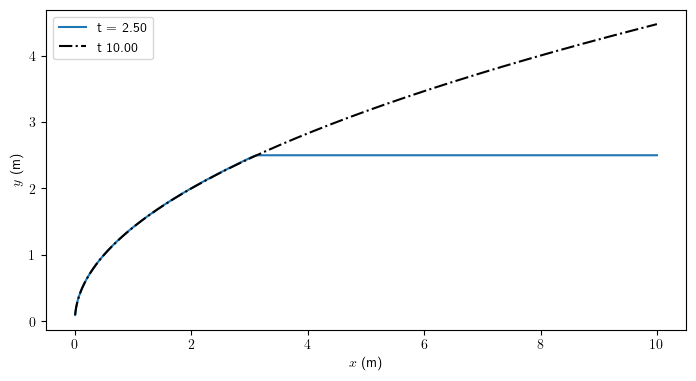

In [4]:
front = []
claw = setup()
claw.run()

ind=5
ind2=20
delta_t=claw.tfinal/claw.num_output_times

fig = plt.figure(figsize=(8,4))
left, bottom, width, heigth = 0.2, 0.2, 0.8, 0.8
ax = fig.add_axes((left ,bottom, width, heigth ))
ax.ylimits = [0,0.1]
frame = claw.frames[ind]
h = frame.q[0,:]
frame = claw.frames[ind2]
h2 = frame.q[0,:]

x = frame.state.grid.x.centers
ax.plot(x,h,label='t =  {:.2f}'.format(ind*delta_t))
ax.plot(x,h2, 'k-.',label='t  {:.2f}'.format(ind2*delta_t))

ax.set_xlabel(r'$x$ (m)')
ax.set_ylabel(r'$y$ (m)')
ax.legend()
plt.show()